# 1) Importation des données

In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import json

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [3]:
data = pd.read_csv("online_shoppers_intention.csv")

# 2) Analyse du data set et des variables

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#Affichage des différentes valeurs présentes dans la colonne des revenues
data["Revenue"].unique()

array([False,  True])

In [6]:
data.shape

(12330, 18)

#3) Preparation des données pour le modèle

In [7]:
#On met la colonne revenu en int (0 pour false 1 pour true)
data["Revenue"] = data["Revenue"].values.astype(int)
data.head()
#Convertir VisitorType en valeur  numérique
data["VisitorType"] = np.asarray([1 if val == "Returning_Visitor" else 0 for val in data["VisitorType"].values])
#Convertir Month en valeur numérique
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i, val in enumerate(data["Month"]):
    data["Month"][i] = months.index(val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
#On met la colonne revenu en int (0 pour false 1 pour true)
data["Weekend"] = data["Weekend"].values.astype(int)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,1,1,0


In [9]:
#On définit x --> sans la colonne Revenue
x = data.iloc[:,0:17]
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,1,1


In [10]:
#On définit y ce qu'on doit prédire --> Les revenues
y= data["Revenue"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [11]:
#Affichage de la shape de x et y
print("x_shape", x.shape)
print("y_shape", y.shape)

x_shape (12330, 17)
y_shape (12330,)


In [12]:
#Division de la dataset en train et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123) #20% test, 80% train

In [13]:
#Exportations des colonnes de la df de X pour l'api
model_columns = list(x.columns)
#joblib.dump(model_columns, 'model_columns.pkl')

In [14]:
#Exportation des x pour tester des lignes à prédire dans notre api
#x.to_json(r'data.json', orient="index")
#x_test.to_json(r'x_test.json', orient="index")

# 4) Application des modèles

In [ ]:
#Définition du dictionnaire qui contiendra tout les modèles testés
#En clé: le nom du modèle et ses best parametres
#En valeur: l'accuracy du modèle
models = {}

In [15]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    import time
    import datetime
    t = datetime.datetime.now().time()
    #print t.isoformat()[:8]
    return time.time()

In [16]:
#Définition de la fonction qui va permettre de plot le modèle en fonction des différents paramètres testés dans le grid search
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Obtient les scores moyens de test et std pour chaque grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot les scores du grid search
    _, ax = plt.subplots(1,1)

    #grid_param_1 est représenté par l'axe des abcisses
    #grid_param_2 est représenté grâce aux différentes couleurs des axes 
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

### KNN

In [ ]:
start_time = print_time()
knn = KNeighborsClassifier(2)
knn.fit(x_train, y_train)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)


Duration time : 0.046593666076660156


In [ ]:
knn.score(x_test, y_test)

0.8548256285482563

In [ ]:
#Cross validation
#test de plusieurs cross_val score moyen en fesant varier le nb de decoupage de 2 à 10
for i in range(2,11):
  print(i)
  print(cross_val_score(KNeighborsClassifier(2), x_train, y_train, cv=i, scoring="accuracy").mean())

2
0.857765612327656
3
0.8600973236009732
4
0.8630373073803731
5
0.8620234730730993
6
0.8624290348742903
7
0.8621242943215671
8
0.8621248986212491
9
0.8620235198702352
10
0.863138241356704


Text(0.5, 1.0, 'Accuracy in terms of neighbors number define in KNN')

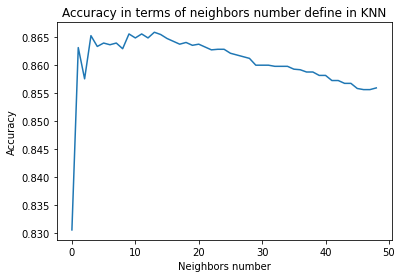

In [ ]:
#Test de différent nombre de voisins allant de 1 à 50
val_score=[]
for i in range(1,50):
    val_score.append(cross_val_score(KNeighborsClassifier(i), x_train, y_train, cv=10, scoring="accuracy").mean())
plt.plot(val_score)
plt.xlabel("Neighbors number")
plt.ylabel("Accuracy")
plt.title("Accuracy in terms of neighbors number define in KNN")
plt.show()

On remarque qu'on obtient la meilleure accuracy avec 10 voisins

In [17]:
#Application du grid search 
param_grid = {'n_neighbors':np.arange(1,20), 'metric':["euclidean", "manhattan", "minkowski"]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(x_train, y_train)

#Affichage du best score et des meilleures paramètres testés
print("best score : ",grid.best_score_)
print("best parameters : ",grid.best_params_)

best score :  0.8658765780707001
best parameters :  {'metric': 'euclidean', 'n_neighbors': 14}


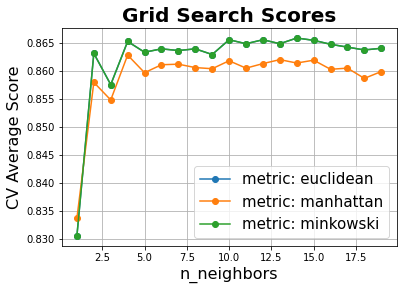

In [ ]:
#Plot des modèles testés en fonctions des hyperparamètres testés dans le modèle
plot_grid_search(grid.cv_results_, param_grid["n_neighbors"], param_grid['metric'], 'n_neighbors', 'metric')

On remarque que le knn performe le mieux avec 14 voisins et la metric minkowski

In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
model = "KNN " + str(grid.best_params_)
models[model] = grid.best_score_

In [22]:
knn=grid.best_estimator_
knn.score(x_test,y_test)

0.8471208434712084

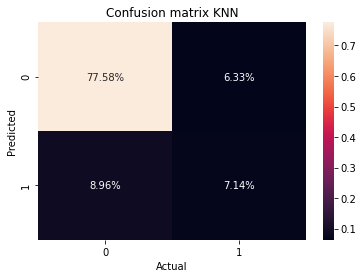

In [23]:
y_pred = knn.predict(x_test)

#Matrice de confusion de la régression linéaire
cf_matrix = confusion_matrix(y_test, y_pred)

#Plot de la matrice de confusion
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set(title="Confusion matrix KNN", xlabel="Actual", ylabel = "Predicted")
plt.show()

Le Knn prédit très bien les 0 mais beaucoup moins bien les 1, cela peut s'expliquer par le fait qu'il y a beaucoup moins de 1 dans la df donc il apprend moins à prédire les 1.

### Logistic regression

In [ ]:
start_time = print_time()
logRegression = LogisticRegression().fit(x_train, y_train)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)


Duration time : 0.19899511337280273


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logRegression.score(x_test, y_test)

0.8722627737226277

In [ ]:
#Cross validation
#test de plusieurs cross_val score moyen en fesant varier le nb de decoupage de 2 à 10
for i in range(2,11):
  print(i)
  print(cross_val_score(LogisticRegression(), x_train, y_train, cv=i, scoring="accuracy").mean())

In [ ]:
#Application du grid search 
param_grid = {'penalty':['l1', 'l2'], 'C':[0, 4, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=6)
grid.fit(x_train, y_train)

In [ ]:
#Affichage du best score et des meilleures paramètres testés
print("best score : ",grid.best_score_)
print("best parameters : ",grid.best_params_)

best score :  0.8826034063260341
best parameters :  {'C': 4, 'penalty': 'l2'}


La logistic regression performe le mieux avec le C à 4 et 'penalty' à l2

In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
model = "Logistic regression " + str(grid.best_params_)
models[model] = grid.best_score_

In [25]:
logRegression=grid.best_estimator_
logRegression.score(x_test,y_test)

0.8734793187347932

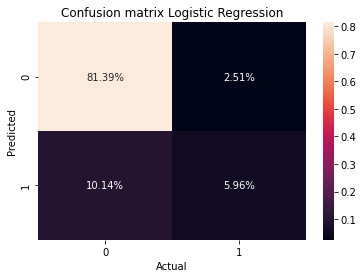

In [26]:
y_pred = logRegression.predict(x_test)

#Matrice de confusion de la régression linéaire
cf_matrix = confusion_matrix(y_test, y_pred)

#Plot de la matrice de confusion
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set(title="Confusion matrix Logistic Regression", xlabel="Actual", ylabel = "Predicted")
plt.show()

On peut voir grâce à la matrice de confusion que le modèle est très performant,
il y a beaucoup plus de 0 à prédire(cad personnes qui n'achètent pas) que de 1.
Environ 10% des valeurs sont prédit 1 alors que c'est 0.
Environ 2% des valeurs sont prédit 0 alors que c'est 1.
Très peu d'erreurs. Le modèle prédit mieux les 0, beaucoup moins bien les 1 car il apprend mieux vu qu'il y a plus de 0 dans la df et les 1 sont plus rares tout comme le KNN.

### Decision Trees

In [ ]:
start_time = print_time()
Dtree = tree.DecisionTreeClassifier()
Dtree.fit(x_train, y_train)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)


Duration time : 0.06683897972106934


In [ ]:
Dtree.score(x_test, y_test)

0.845904298459043

In [ ]:
#tree.plot_tree(Dtree)

In [ ]:
#Cross validation
#test de plusieurs cross_val score moyen en fesant varier le nb de decoupage de 2 à 10
for i in range(2,11):
  print(i)
  print(cross_val_score(tree.DecisionTreeClassifier(), x_train, y_train, cv=i, scoring="accuracy").mean())

2
0.8570559610705596
3
0.8629359286293593
4
0.8614152473641525
5
0.8649639812930957
6
0.8638483373884834
7
0.856954820041663
8
0.863544201135442
9
0.8638483373884834
10
0.8610078073782704


In [27]:
#Application du grid search 
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12,13]}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

#Affichage du best score et des meilleures paramètres testés
print("best score : ",grid.best_score_)
print("best parameters : ",grid.best_params_)

best score :  0.9022706127035466
best parameters :  {'criterion': 'gini', 'max_depth': 4}


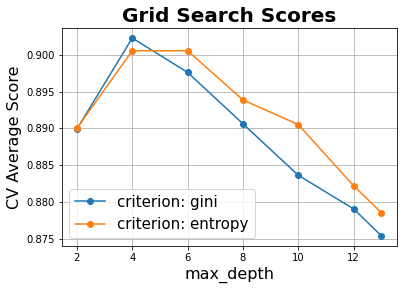

In [ ]:
#Plot des modèles testés en fonctions des hyperparamètres testés dans le modèle
plot_grid_search(grid.cv_results_, param_grid["max_depth"], param_grid['criterion'], 'max_depth', 'criterion')

Le decision tree performe le mieux avec le "max_depth" à 4 et le criterion "gini". Cependant on voit qu'avec un max_depth supérieur à 4 le criterion "entropy" performe toujours mieux.

In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
model = "Decision tree " + str(grid.best_params_)
models[model] = grid.best_score_

In [28]:
Dtree=grid.best_estimator_
Dtree.score(x_test,y_test)

0.8909164639091647

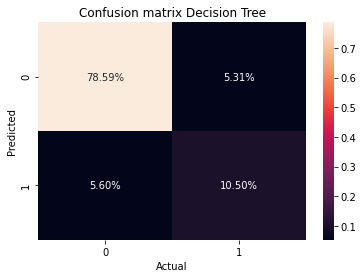

In [29]:
y_pred = Dtree.predict(x_test)

#Matrice de confusion de la régression linéaire
cf_matrix = confusion_matrix(y_test, y_pred)

#Plot de la matrice de confusion
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set(title="Confusion matrix Decision Tree", xlabel="Actual", ylabel = "Predicted")
plt.show()

C'est le modèle qui a la meilleur répartition de prédiction au niveau des 1 et des 0. C'est peut être pas celui qui prédit le mieux les 0 mais dans la globalité 1, 0 c'est celui qui prédit le mieux. Le modèle arrive à parer le fait qu'il n'y ai pas assez de 1 comparé à la plupart des autres modèles testés plus haut.

### Support Vector Machine

In [30]:
start_time = print_time()
SVM = svm.SVC()
SVM.fit(x_train, y_train)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)


Duration time : 2.280254602432251


In [31]:
SVM.score(x_test, y_test)

0.8414436334144363

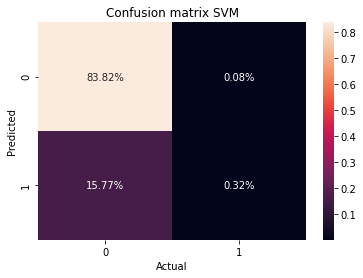

In [32]:
y_pred = SVM.predict(x_test)

#Matrice de confusion de la régression linéaire
cf_matrix = confusion_matrix(y_test, y_pred)

#Plot de la matrice de confusion
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set(title="Confusion matrix SVM", xlabel="Actual", ylabel = "Predicted")
plt.show()

Le modèle ne prédit pas du tout bien les 1. Il a peut être une bonne accuracy mais fait trop d'erreur au niveau de la prédiction des 1.

In [ ]:
#Cross validation
#test de plusieurs cross_val score moyen en fesant varier le nb de decoupage de 2 à 10
for i in range(2,11):
  print(i)
  print(cross_val_score(svm.SVC(), x_train, y_train, cv=i, scoring="accuracy").mean())

2
0.8476277372262774
3
0.8477291159772912
4
0.8480332522303325
5
0.8481346041746128
6
0.8482360097323601
7
0.8485401058328892
8
0.8483373884833738
9
0.8488442822384429
10
0.8488442038590931


Modèle qui ne charge pas avec grid alors nous avons testé avec une boucle

In [ ]:
#On test le modèle svm avec le kernel 'poly' et sur les degrés variant de 1 à 4 et le c valant 1,10 et 100
scores=[]
for i in [1,10,100]:
  print("C: ", i) #Affichage du C
  for j in range(1,4):
    SVM = svm.SVC(kernel= 'poly', C = i, degree=j)
    SVM.fit(x_train, y_train)
    print("degree: ", j) #Affichage du degre
    print(SVM.score(x_test, y_test)) #Affichage du score du modèle
    scores.append(SVM.score(x_test, y_test)) #Ajout du score dans une liste de score

C:  1
degree:  1
0.8402270884022709
degree:  2
0.8394160583941606
degree:  3
0.8402270884022709
C:  10
degree:  1
0.8669910786699108
degree:  2
0.8479318734793188
degree:  3
0.8418491484184915
C:  100
degree:  1
0.8779399837793999
degree:  2
0.8556366585563666
degree:  3
0.843065693430657


In [ ]:
#On ajoute le model et son best score dans le dictionnaire des modèles
models["SVM poly"] = max(scores)

In [ ]:
#On test le modèle svm avec le kernel 'linear' et le c valant 1,10 et 100
scores=[]
for i in [1,10,100]:
  print("C:", i) #Affichage du C
  SVM = svm.SVC(kernel= 'linear', C = i)
  SVM.fit(x_train, y_train)
  print(SVM.score(x_test, y_test)) #Affichage du score du modèle
  scores.append(SVM.score(x_test, y_test)) #Ajout du score dans une liste de score

C: 1
0.8828061638280617
C: 10
0.884022708840227
C: 100
0.884022708840227


In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
models["SVM linear"] = max(scores)

In [ ]:
#Application du grid search 
param_grid ={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, cv=9)
grid.fit(x_train, y_train)

#Affichage du best score et des meilleures paramètres testés
print("best score : ",grid.best_score_)
print("best parameters : ",grid.best_params_)

best score :  0.8685117599351176
best parameters :  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


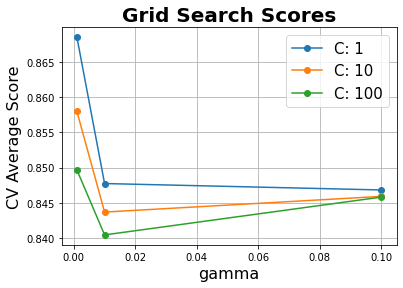

In [ ]:
#Plot des modèles testés en fonctions des hyperparamètres testés dans le modèle
plot_grid_search(grid.cv_results_, param_grid["gamma"], param_grid['C'], 'gamma', 'C')

On remarque que le modèle svm avec le kernel 'rbf' performe le mieux avec le C valant 1 et le gamma très proche de 0. Lorsque gamma augmente l'accuracy du modèle diminue très rapidement.

In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
model = "SVM rbf " + str(grid.best_params_)
models[model] = grid.best_score_

In [ ]:
#Application du grid search 
param_grid ={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['sigmoid']}
grid = GridSearchCV(svm.SVC(), param_grid, cv=9)
grid.fit(x_train, y_train)

#Affichage du best score et des meilleures paramètres testés
print("best score : ",grid.best_score_)
print("best parameters : ",grid.best_params_)

best score :  0.7844687753446877
best parameters :  {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


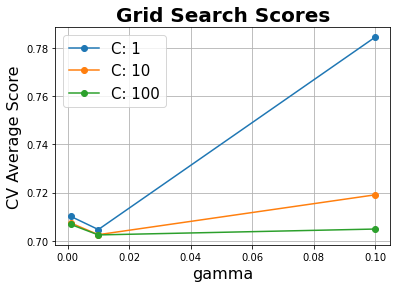

In [ ]:
#Plot des modèles testés en fonctions des hyperparamètres testés dans le modèle
plot_grid_search(grid.cv_results_, param_grid["gamma"], param_grid['C'], 'gamma', 'C')

On remarque que le modèle svm avec le kernel 'sigmoid' performe le mieux, à contrario du modèle précédent, avec un gamma assez élevé et C valant 1.

In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
model = "SVM sigmoid " + str(grid.best_params_)
models[model] = grid.best_score_

Parmi tout les types de svm testés c'est le SVM avec le kernel 'linear' qui obtient la meilleure accuracy cependant le temps d'éxecution du modèle est vraiment long, nous n'avons pas pu appliquer le grid search car il prenait vraiment trop de temps.

### Gaussian Naive Bayes

In [ ]:
start_time = print_time()
gnb = GaussianNB()
gnb.fit(x_train, y_train)
end_time = print_time()
print ("\nDuration time :", end_time - start_time)


Duration time : 0.014777660369873047


In [ ]:
gnb.score(x_test, y_test)

0.8365774533657745

In [ ]:
#Cross validation
#test de plusieurs cross_val score moyen en fesant varier le nb de decoupage de 2 à 10
for i in range(2,11):
  print(i)
  print(cross_val_score(GaussianNB(), x_train, y_train, cv=i, scoring="accuracy").mean())

2
0.8461070559610706
3
0.8474249797242498
4
0.8458029197080292
5
0.8469178740584093
6
0.8467153284671532
7
0.845905429202773
8
0.8471208434712085
9
0.8466139497161396
10
0.8463098372144163


In [33]:
#Application du grid search 
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid.fit(x_train, y_train)

#Affichage du best score et des meilleures paramètres testés
print("best score : ",grid.best_score_)
print("best parameters : ",grid.best_params_)

best score :  0.8614145939760807
best parameters :  {'var_smoothing': 4.328761281083053e-06}


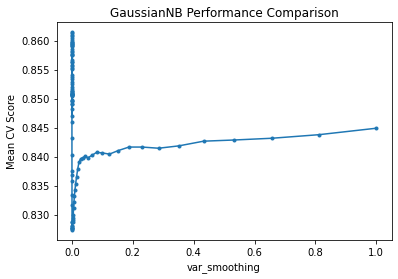

In [ ]:
scores_mean = grid.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

#Plot des modèles testés en fonctions des hyperparamètres testés dans le modèle
plt.plot(param_grid['var_smoothing'], scores_mean, marker = '.')    
plt.xlabel('var_smoothing')
plt.ylabel("Mean CV Score")
plt.title("GaussianNB Performance Comparison")
plt.show()

Le modèle GaussianNB a une meilleure accuracy lorsque le varsmoothing est très proche de 0.

In [ ]:
#On met dans le dictionnaire le modèle, ses best parametres et son best score
model = "GaussianNB " + str(grid.best_params_)
models[model] = grid.best_score_

In [34]:
gnb=grid.best_estimator_
gnb.score(x_test,y_test)

0.8471208434712084

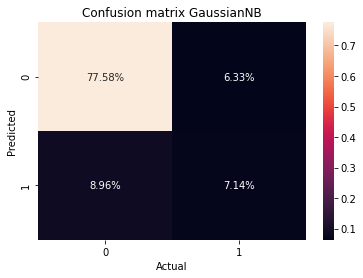

In [35]:
y_pred = gnb.predict(x_test)

#Matrice de confusion de la régression linéaire
cf_matrix = confusion_matrix(y_test, y_pred)

#Plot de la matrice de confusion
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set(title="Confusion matrix GaussianNB", xlabel="Actual", ylabel = "Predicted")
plt.show()

Le modèle est assez performant, la moitié des 1 sont bien prédits, comparé aux knn, svm et logistic regression qui prédisaient tout trois pas assez bien les 1. Ce modèle arrive donc à assez bien prédire bien les 1 malgré le fait qu'il y a peu de 1 dans la df.

# 5) Best model

In [ ]:
#Selectionnons désormais le modèle le plus performant 

best_model=""
best_accuracy = 0

#Parcours du dictionnaire contenant tout les modèles testés
for key, val in models.items():
  if val > best_accuracy:
    best_model = key #selection du best modèle avec ses meilleurs paramètres
    best_accuracy = val #selection de la meilleur accuracy

#Affichage du best score et des meilleures paramètres du meilleur modèle
print("best_model ", best_model)
print("accuracy ", best_accuracy)

best_model  Decision tree {'criterion': 'gini', 'max_depth': 4}
accuracy  0.9022706127035466


On en conclue que le meilleur modèle parmi tout les modèles de classification testés est le decision tree avec les paramètres 'criterion':"gini" et 'max_depth':4.

In [ ]:
#Application du meilleur modèle avec les meilleurs paramètres testés
start_time = print_time()
Dtree = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 4)
Dtree.fit(x_train, y_train)
end_time = print_time()

print(Dtree.score(x_test, y_test))
print ("\nDuration time :", end_time - start_time)

0.8917274939172749

Duration time : 0.03666353225708008


Exportons le meilleur modèle afin de creer notre api sur ce modèle

In [ ]:
#joblib.dump(Dtree, 'model.pkl')